<h1><b>Analysis3</b></h1>
<h1><b> In this analysis we analyze the on-time performance of the flights in the the United States for the month of January 2017. The goal is to reveal pattern of flight delay due to airport characteristics, carrier and date and time of travel</b></h1>

<h3><b>First we will load all the modules required for the analysis</b></h3>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import csv
import xlrd
%matplotlib inline

<h3><b>Now we will be Loading data for airports, carrier and statistical data for the month of January 2016 and do cleaning of data.</b></h3>

In [3]:
import sys, os, datetime
path = os.getcwd()+'\\ONTIME.csv'
path1 = os.getcwd()+'\\airports new2.csv'

<h3><b>Adding additional datasets for more accuracy of results</b></h3>

In [4]:
book  = xlrd.open_workbook('airports_new.xlt')
sheet = book.sheet_by_index(0)
airport_data = [[sheet.cell_value(i,j) for j in range(sheet.ncols)] for i in range(sheet.nrows)]

#Convert to dict
airport_dict = {}
for j in range(len(airport_data[0])):
    key = airport_data[0][j]
    airport_dict[key] = [airport_data[i][j] for i in range(1,len(airport_data))]

book = xlrd.open_workbook('carriers.xls')
sheet = book.sheet_by_index(0)
#every other row in 'carrriers.xls' sheet is empty'
carrier_data = [[sheet.cell_value(i,j) for j in range(sheet.ncols)]
                for i in range(0,sheet.nrows,2)]
#convert to dictionary for easy look-up
carrier_dict = {}
for j in range(len(carrier_data[0])):
    key = carrier_data[0][j]
    carrier_dict[key] = [carrier_data[i][j] for i in range(1,len(carrier_data))]

print('Fields in the additional carrier data set:')
print('-----------------------------------------')
for key in carrier_dict.keys():
    print(key)
print('')
print('Fields in the additional airport data set:')
print('-----------------------------------------')
for key in airport_dict.keys():
    print(key)

Fields in the additional carrier data set:
-----------------------------------------
Description
Code

Fields in the additional airport data set:
-----------------------------------------
airport
city
lat
iata
state
country
long


<h3><b>Loading data for the month of January, 2017</b></h3>

In [5]:
delay_data = []
f = open('Jan2017_ONTIME.csv', 'r')
reader = csv.reader(f)
delay_data_header = next(reader,None)
for row in reader:
    delay_data.append(row)
f.close()

In [6]:
#Display the columns in the dataframe
for i,s in enumerate(delay_data_header):
    print(str(i) + ': ' + s)

0: MONTH
1: DAY_OF_MONTH
2: DAY_OF_WEEK
3: UNIQUE_CARRIER
4: ORIGIN
5: ORIGIN_CITY_NAME
6: ORIGIN_STATE_ABR
7: DEST
8: DEST_CITY_NAME
9: DEST_STATE_ABR
10: DEP_TIME
11: DEP_DELAY
12: TAXI_OUT
13: TAXI_IN
14: ARR_TIME
15: ARR_DELAY
16: CANCELLED
17: ACTUAL_ELAPSED_TIME
18: AIR_TIME
19: DISTANCE
20: CARRIER_DELAY
21: WEATHER_DELAY
22: NAS_DELAY
23: SECURITY_DELAY
24: LATE_AIRCRAFT_DELAY
25: 


In [7]:
delay_data = [d[:-1] for d in delay_data]
delay_data_header = delay_data_header[:-1]

In [8]:
#remove cancelled flights and flights with missing data
delay_data = [d for d in delay_data if d[16] != '1.00']

In [9]:
#determine the rows with missing data:
rows_with_missing_data = []
for i in range(len(delay_data)):
    for j in range(20):
        if len(delay_data[i][j]) == 0:
            rows_with_missing_data.append(i)
            break

In [10]:
i = rows_with_missing_data[0]
print('Example row in the data with missing entries:\n')
for j in range(len(delay_data[i])):
    print(delay_data_header[j] + ': ' + str(delay_data[i][j]))

Example row in the data with missing entries:

MONTH: 1
DAY_OF_MONTH: 27
DAY_OF_WEEK: 5
UNIQUE_CARRIER: AA
ORIGIN: CLT
ORIGIN_CITY_NAME: Charlotte, NC
ORIGIN_STATE_ABR: NC
DEST: TPA
DEST_CITY_NAME: Tampa, FL
DEST_STATE_ABR: FL
DEP_TIME: 1646
DEP_DELAY: 6.00
TAXI_OUT: 26.00
TAXI_IN: 3.00
ARR_TIME: 2044
ARR_DELAY: 
CANCELLED: 0.00
ACTUAL_ELAPSED_TIME: 
AIR_TIME: 
DISTANCE: 507.00
CARRIER_DELAY: 
WEATHER_DELAY: 
NAS_DELAY: 
SECURITY_DELAY: 
LATE_AIRCRAFT_DELAY: 


In [11]:
#remove rows with missing entries:
delay_data = [delay_data[i] for i in range(len(delay_data)) if i not in rows_with_missing_data]

In [12]:
float_index = set([11,12,13,15,17,18,19,20,21,22,23,24])
for i in range(len(delay_data)):
    for j in float_index:
        if len(delay_data[i][j]) > 0:
            try:
                delay_data[i][j] = float(delay_data[i][j])
            except ValueError:
                #print('Line {i} is corrupt!'.format(i = index)'
                break
        else:
            #delay type fields
            delay_data[i][j] = 0.0
            
int_index = set([1,2])
for i in range(len(delay_data)):
    for j in int_index:
        delay_data[i][j] = int(delay_data[i][j])

In [14]:
#get the list of unique carrires:
carrier_ID = set()
airport_ID = set()
for d in delay_data:
    carrier_ID.add(d[3])
    airport_ID.add(d[4])
    airport_ID.add(d[7])
    
#count total arrivals and departures from each airport
flight_count_dict = {iata: 0 for iata in airport_ID}
for d in delay_data:
    flight_count_dict[d[4]] += 1
    flight_count_dict[d[7]] += 1

pairs = []
for key, value in flight_count_dict.items():
    pairs.append((key,value))

#sort airports according to 
pairs.sort(key = lambda x: x[1], reverse = True)

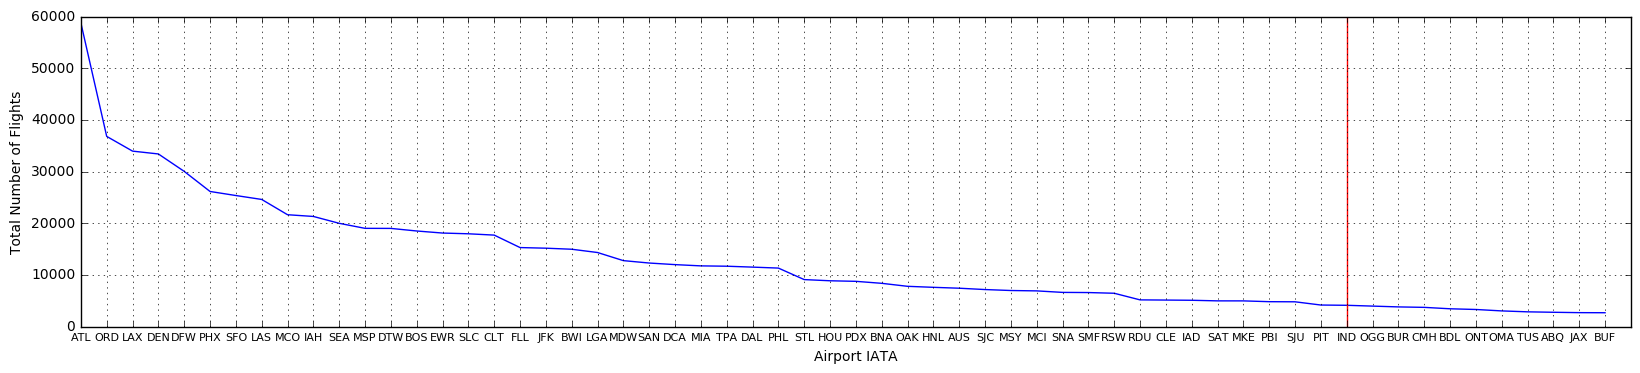


Use data from 50 most busy airports according to number of total incoming and outgoing domestic flights


In [17]:
c = [c for a,c in pairs]
a = [a for a,c in pairs]
plt.figure(figsize = (20,4))
N = 60
plt.plot(c[:N])
plt.xticks(range(N), a[:N], fontsize = 8)
plt.ylabel('Total Number of Flights')
plt.xlabel('Airport IATA')
plt.grid()
plt.axvline(49, color = 'r')
plt.show()

print('\n'+'Use data from 50 most busy airports according to number of total incoming and outgoing domestic flights')


# Remove data from non busy airports

In [18]:
airports_to_keep = [a for a,c in pairs[:52]]
delay_data2 = [d for d in delay_data if (d[4] in airports_to_keep and d[7] in airports_to_keep)]
print('Size of the dataset is reduced from ' + str(len(delay_data)) + ' to ' + str(len(delay_data2)))
#let's delete the large dataset
delay_data = delay_data2

Size of the dataset is reduced from 439645 to 296726


In [19]:
#find out carrier names from carrier_data
carrier_info = {}
for code in carrier_ID:
    k = carrier_dict['Code'].index(code)
    carrier_info[code] = carrier_dict['Description'][k]

In [20]:
airport_info = {}
for iata in airports_to_keep:
    k = airport_dict['iata'].index(iata)
    airport_info[iata] = {key: airport_dict[key][k] for key in airport_dict.keys()}

In [21]:
delay_data_dict = {}
for j in range(len(delay_data_header)):
    key = delay_data_header[j]
    delay_data_dict[key] = [delay_data[i][j] for i in range(len(delay_data))]
for key in delay_data_dict.keys():
    print(key)

WEATHER_DELAY
UNIQUE_CARRIER
ACTUAL_ELAPSED_TIME
ORIGIN_CITY_NAME
AIR_TIME
DAY_OF_MONTH
ORIGIN_STATE_ABR
DEST_CITY_NAME
DISTANCE
SECURITY_DELAY
NAS_DELAY
DAY_OF_WEEK
DEST
CARRIER_DELAY
ARR_DELAY
DEST_STATE_ABR
ARR_TIME
TAXI_OUT
ORIGIN
MONTH
CANCELLED
DEP_DELAY
LATE_AIRCRAFT_DELAY
TAXI_IN
DEP_TIME


In [22]:
carrier_info

{'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines Inc.',
 'HA': 'Hawaiian Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'OO': 'Skywest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.'}

<h3><b>Following assumptions are being made and used to calculate on-time performance of flights</b></h3>

<h4>1. At origin airport, a delay of more than 15minutes is considered to be as a late flight</h4>
<h4>2. At the destination airport, if difference between arrival time and departure time is considered to be at a late flight</h4>

In [23]:
N = len(delay_data_dict['ORIGIN']) # N: sample size
carrier_performance = {}
airport_performance = {}

#airport on time performance
for airport in airport_info.keys():
    #departures:
    ind = [i for i in range(N) if delay_data_dict['DEST'][i] == airport]
    total_flights   = len(ind)
    on_time_flights = sum( [delay_data_dict['DEP_DELAY'][i] <= 15 for i in ind] )
    #arrivals:
    ind = [i for i in range(N) if delay_data_dict['ORIGIN'][i] == airport]
    total_flights   += len(ind)
    on_time_flights += sum( [delay_data_dict['ARR_DELAY'][i] - delay_data_dict['DEP_DELAY'][i] <= 15 for i in ind] )

    if total_flights > 0:
        airport_performance[airport] = {'total_flights': total_flights,
                                        'on_time_flights': on_time_flights,
                                        'on_time_ratio': on_time_flights/total_flights} 

#carreir on time performance        
for carrier in carrier_info.keys():
    #departures:
    ind = [i for i in range(N) if delay_data_dict['UNIQUE_CARRIER'][i] == carrier]
    total_flights   = len(ind)
    on_time_flights = sum( [delay_data_dict['DEP_DELAY'][i] <= 15 for i in ind] )
    
    if total_flights > 0:
        carrier_performance[carrier] = {'total_flights': total_flights,
                                        'on_time_flights': on_time_flights,
                                        'on_time_ratio': on_time_flights/total_flights}

<h3><b>Plot the accquired data</b></h3>

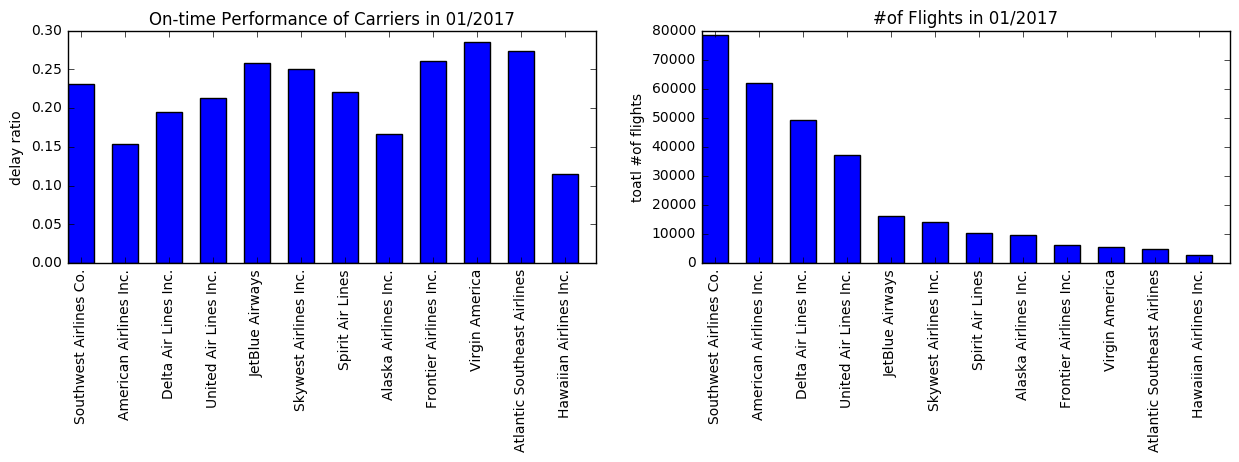

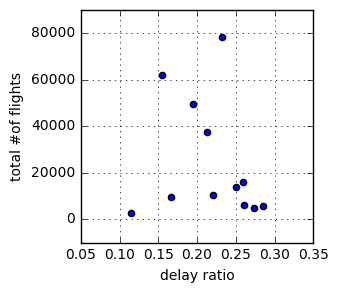

In [24]:
name = []
code = []
on_time = []
flights = []
for key in carrier_performance.keys():
    code.append(key)
    name.append(carrier_info[key])
    on_time.append(carrier_performance[key]['on_time_ratio'])
    flights.append(carrier_performance[key]['total_flights'])

name, code, on_time, flights = zip( *sorted( zip(name, code, on_time, flights), key = lambda x: x[3], reverse = True ) )

fig = plt.figure(figsize = (15,3))
width = .6
ax1 = plt.subplot(121)
ax1.bar(range(len(on_time)), [1- v for v in on_time], width = width)
ax1.set_xticks(np.arange(len(on_time)) + width/2)
ax1.set_xticklabels(name, rotation = 90)
ax1.set_title('On-time Performance of Carriers in 01/2017')
ax1.set_ylabel('delay ratio')

ax2 = plt.subplot(122)
ax2.bar(range(len(on_time)), flights, width = width)
ax2.set_xticks(np.arange(len(on_time)) + width/2)
ax2.set_xticklabels(name, rotation = 90)
ax2.set_ylabel('toatl #of flights')
ax2.set_title('#of Flights in 01/2017')
plt.show()

fig = plt.figure(figsize=(3,3))
plt.scatter([1- v for v in on_time], flights)
#plt.xticks([0.14, 0.16, 0.20, 0.26])
plt.xlabel('delay ratio')
plt.ylabel('total #of flights')
plt.grid()
plt.show()

<h2><b>Conclusion</b></h2>
<h3>1. The graph in upper left corner displays the on-time performance of flights based on Carriers. According to the graph, Hawaiian Airlines, Alaska Airlines and American Airlines are the ones whose flights are on-time as Y-axis depicts delay ratio</h3>
<h3>2. The graph in upper right corner displays the total number of flights each carrier had in the month of January in the year 2017</h3>
<h3>3. The graph at bottom display the ratio of number of flights according to delay ratio</h3>

In [25]:
#find the airlines within each category:
bad_p = []
moderate_p = []
best_p = []

for c,v in zip(code, on_time):
    r = 1-v
    if r > 0.20:
        bad_p.append(c)
    elif r <= 0.15:
        best_p.append(c)
    else:
        moderate_p.append(c)

In [34]:
print('Carriers with best on-time performance:')
print('------------------')
for c in best_p:
    print(carrier_info[c])

Carriers with best on-time performance:
------------------
Hawaiian Airlines Inc.


In [35]:
print('Carriers with moderate on-time performance:')
print('------------------')
for c in moderate_p:
    print(carrier_info[c])

Carriers with moderate on-time performance:
------------------
American Airlines Inc.
Delta Air Lines Inc.
Alaska Airlines Inc.


In [36]:
print('Carriers with worst on-time performance')
print('------------------')
for c in bad_p:
    print(carrier_info[c])

Carriers with worst on-time performance
------------------
Southwest Airlines Co.
United Air Lines Inc.
JetBlue Airways
Skywest Airlines Inc.
Spirit Air Lines
Frontier Airlines Inc.
Virgin America
Atlantic Southeast Airlines


<h3><b>Let's visualize airport traffic and on time performance of all airports on the map of the USA.</b></h3>

In [37]:
lat = []
lon = []
name = []
on_time = []
flights = []
for key in airport_performance.keys():
    name.append(airport_info[key]['airport'])
    lat.append(airport_info[key]['lat'])
    lon.append(airport_info[key]['long'])
    on_time.append(airport_performance[key]['on_time_ratio'])
    flights.append(airport_performance[key]['total_flights'])

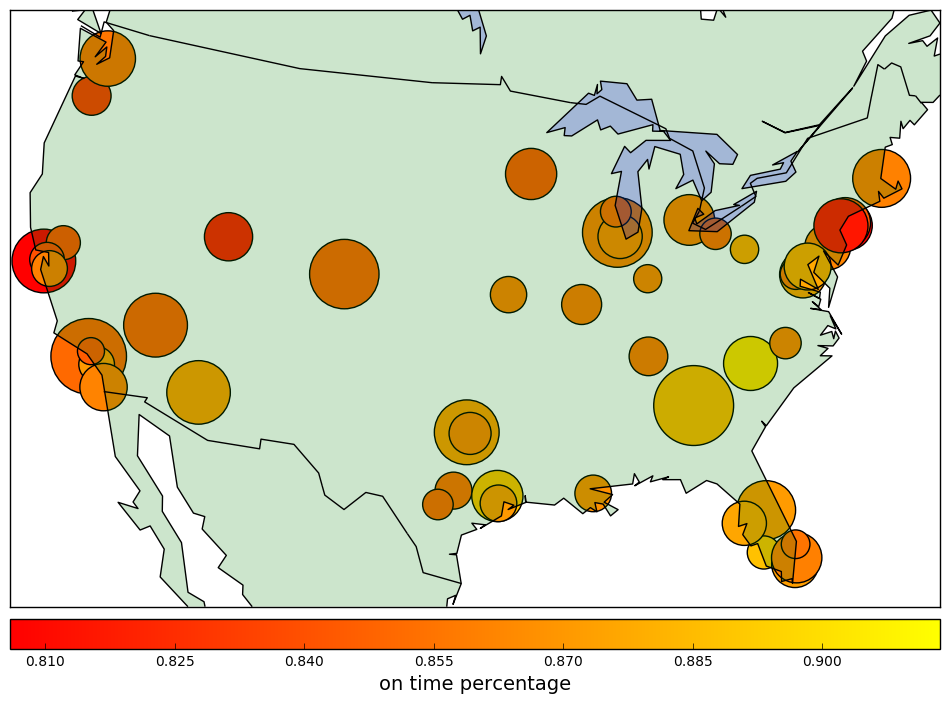

In [39]:
fig = plt.figure(figsize=[12,10])
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawcoastlines(linewidth=1)
m.fillcontinents(color = 'green', lake_color = 'blue', alpha = 0.2)
m.drawcountries(linewidth=1)
x,y = m(lon, lat)

im = m.scatter(x,y, marker = 'o', s = np.array(flights)/10, c = on_time,
          cmap = 'autumn')
cb = m.colorbar(im,'bottom')
cb.set_label('on time percentage', fontsize = '14')
plt.show()

<h3><b>In the map above, airport locations are shown with circles color coded accordinf to on-time performance. The area of each circle is proportional to the total number of flights at that airport</b></h3>

<h1><b>Conclusion</b></h1>

Analysis of on-time performance data of US domestic flights in December 2014 is conducted. We have identified key aspects that that could be used as features for a simple linear probability modeling of delays.

<b>Some possibilities to enhance the model and its performance can be listed as</b>
Inclusion of more data from other years like 2016 and 2015 etc